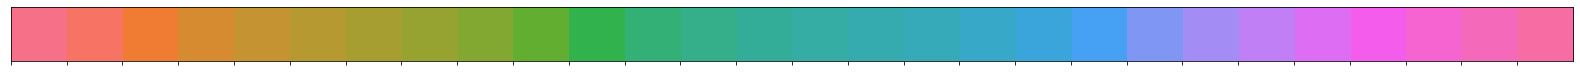

In [19]:
import seaborn as sns
sns.palplot(sns.color_palette("husl", 28))


In [78]:
col_palette = list(sns.color_palette("tab10", 28))

In [79]:
col_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.89

In [20]:
import matplotlib.pyplot as plt
import os
# plt.switch_backend('agg')
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline


In [21]:
import pandas as pd

In [49]:
path_annotation = '/Users/klanna/UniParis/PoincareMSA/examples/thioredoxins/annotation.csv'
df = pd.read_csv(path_annotation)
df['proteins'] = list(df.index)
df = df.set_index(['proteins'])

In [24]:
import sys
sys.path.append("/Users/klanna/UniParis/PoincareMSA/")
sys.path.append("/Users/klanna/UniParis/PoincareMSA/scripts/")
sys.path.append("/Users/klanna/UniParis/PoincareMSA/scripts/build_poincare_map/")


NameError: name 'poincare_distance' is not defined

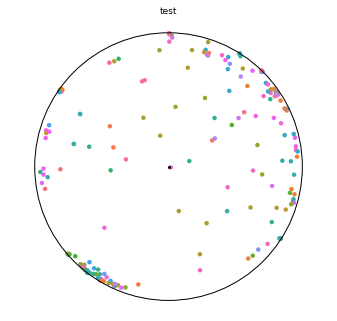

In [72]:
import numpy as np
def plotPoincareDisc(
    x,
    labels=None,
    title_name=None,
    labels_name='labels',
    labels_order=None,
    labels_pos=None,
    labels_text=None,
    file_name=None,
    coldict=None,
    d1=4.5, d2=4.0, fs=9, ms=20,
    u=None,
    v=None,
    alpha=1.0,
    col_palette=plt.get_cmap("tab10"),
    print_labels=True,
    bbox=(1.3, 0.7),
    leg=True,
    ft='png'):    

    idx = np.random.permutation(len(x))
    df = pd.DataFrame(x[idx, :], columns=['pm1', 'pm2'])
    
    fig = plt.figure(figsize=(d1, d2))
    ax = plt.gca()
    circle = plt.Circle((0, 0), radius=1,  fc='none', color='black')
    ax.add_patch(circle)
    ax.plot(0, 0, '.', c=(0, 0, 0), ms=4)
    if title_name:
        ax.set_title(title_name, fontsize=fs)

    if not (labels is None):
        df[labels_name] = labels[idx]
        if labels_order is None:
            labels_order = np.unique(labels)        
#         if coldict is None:
#             coldict = dict(zip(labels_order, col_palette[:len(labels)]))
        sns.scatterplot(            
            x="pm1", y="pm2",
            hue=labels_name,
            hue_order=labels_order,
#             palette=coldict,
            alpha=alpha, edgecolor="none",
            data=df, 
            ax=ax, 
            s=ms)
        
        if leg:
            ax.legend(
                fontsize=fs, 
                loc='outside', 
                bbox_to_anchor=bbox,
                facecolor='white'
                )
        else:
            ax.legend_.remove()
            
    else:
        sns.scatterplot(
            x="pm1", y="pm2",
            data=df, ax=ax, s=ms)

        # if leg == False:
        #     ax.legend_.remove()

    if not (u is None):     
        a, b = get_geodesic_parameters(u, v)        
        circle_geo = plt.Circle((-a/2, -b/2), radius=np.sqrt(a**2/4 + b**2/4 - 1),  fc='none', color='grey')
        ax.add_patch(circle_geo)

    fig.tight_layout()
    ax.axis('off')
    ax.axis('equal') 

    if print_labels:
        if labels_text is None:
            labels_list = np.unique(labels)
        else:
            labels_list = np.unique(labels_text)
        if labels_pos is None:  
            labels_pos = {}  
            for l in labels_list:
        #         i = np.random.choice(np.where(labels == l)[0])
                ix_l = np.where(labels == l)[0]
                Dl = poincare_distance(th.DoubleTensor(x[ix_l, :])).numpy()
                i = ix_l[np.argmin(Dl.sum(axis=0))]
                labels_pos[l] = i

        for l in labels_list:    
            ax.text(x[labels_pos[l], 0], x[labels_pos[l], 1], l, fontsize=fs)

    ax.set_ylim([-1.01, 1.01])
    ax.set_xlim([-1.01, 1.01]) 

    plt.tight_layout()

    if file_name:
        if ft == 'png':            
            plt.savefig(file_name + '.' + ft, format=ft, dpi=300)
        else:
            plt.savefig(file_name + '.' + ft, format=ft)

    return labels_pos

labels_name = 'Species'
labels = df[labels_name].values
plotPoincareDisc(
    result[['pm1', 'pm2']].values, 
    labels=result[labels_name].values, 
    title_name='test',
    file_name='./tmp', 
    d1=5.5, d2=5.0, 
    bbox=(1.2, 1.),
    leg=False,
    )

In [ ]:
path_embeddings = '/Users/klanna/UniParis/results/thioredoxins/fasta0.9/PM3sigma=1.00gamma=1.00cosinepca=0_seed0.csv'
embeddings = pd.read_csv(path_embeddings)
embeddings = embeddings.set_index(['proteins'])


In [69]:
result = pd.concat([embeddings, df], axis=1, join="inner")
result

,pm1,pm2,Species
proteins,,,
42,-0.433272,-0.853774,Pichia
115,-0.061917,0.231050,Chlorobium
170,0.589403,0.602385,Bdellovibrio
196,0.008612,0.987569,Thiobacillus
19,-0.609822,-0.772400,Ornithorhynchus
...,...,...,...
70,0.914478,0.039811,Methanosaeta
96,0.537775,0.825019,Listeria
127,-0.816399,0.555830,Mycobacterium


TypeError: 'ListedColormap' object is not subscriptable

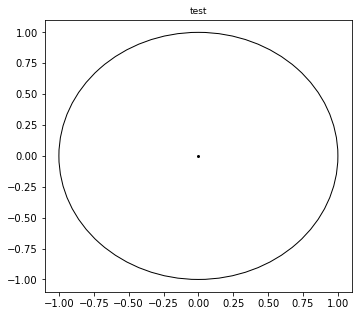